In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/''python-machine-learning-book-2nd-edition''/master/code/ch10/housing.data.txt',header=None,sep='\s+')

In [6]:
df.columns =['CRIM', 'ZN', 'INDUS', 'CHAS', 
            'NOX', 'RM','AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
             'LSTAT', 'MEDV' ]

In [7]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

/usr/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


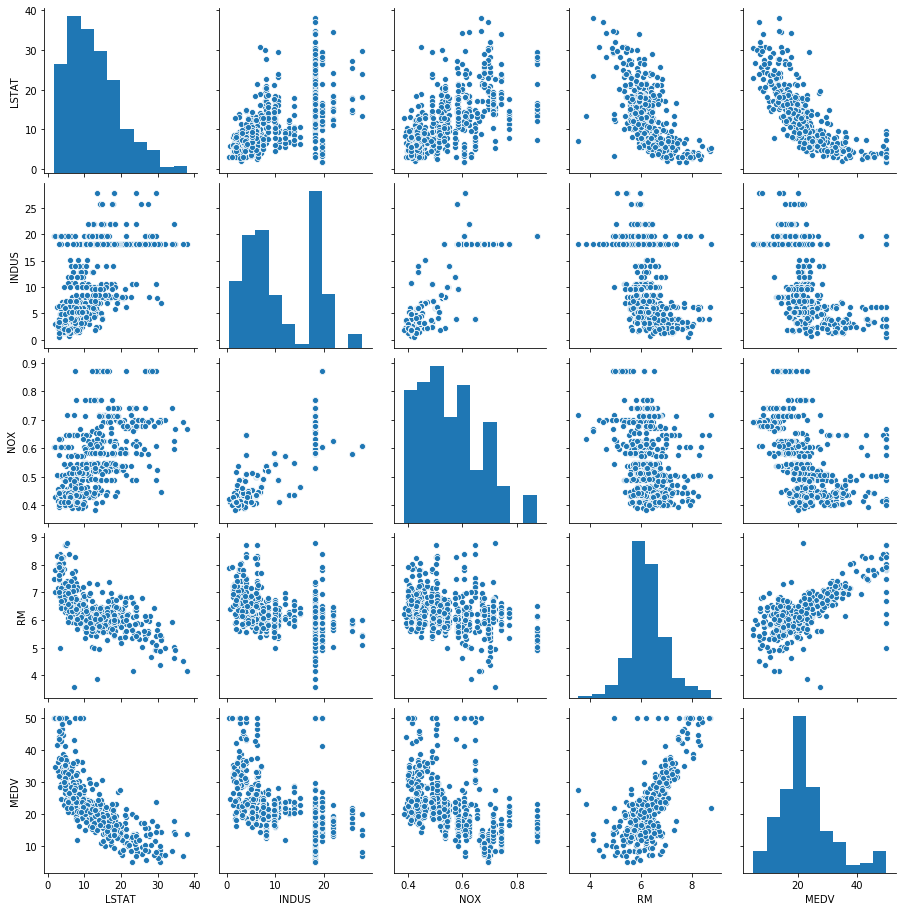

In [12]:
sns.pairplot(df[cols], size =2.5)

#### Corerelation Matrix

In [15]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
cm

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

In [16]:
sns.set(font_scale=1.5)

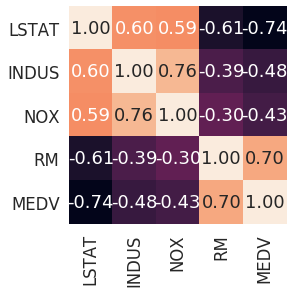

In [25]:
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f',yticklabels=cols, xticklabels=cols)

Given the linear relationship between these MEDV and RM variables that we observed in the scatterplot, RM seems to be a good choice for an exploratory variable to use for Simple Linear Regresion.

# Simple Linear Regression

In [57]:
class LinearRegressionGD():
    def __init__(self, eta = 0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
        
    def fit(self,X, y):
        self.w = np.zeros(1 + X.shape[1])
        self.costs = []
        
        for i in range(self.n_iter):
            output  = self.net_input(X)
            errors = (y - output)
            self.w[1:] += self.eta * X.T.dot(errors)
            self.w[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.costs.append(cost)
            
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self,X):
        return self.net_input(X)

In [58]:
X = df[['RM']].values

In [59]:
y = df['MEDV'].values


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()
X.shape

(506, 1)

In [62]:
X_std = sc.fit_transform(X)
print(y.shape)


(506,)


In [63]:
y_std = sc.fit_transform(y[:, np.newaxis]).flatten()

In [64]:
y_std.shape

(506,)

In [65]:
lr = LinearRegressionGD()

In [66]:
lr.fit(X_std, y_std)

Text(0, 0.5, 'SSE')

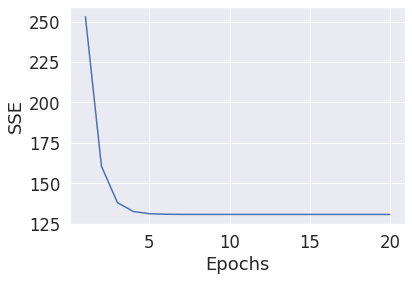

In [68]:
plt.plot(range(1, lr.n_iter+1), lr.costs)
plt.xlabel('Epochs')
plt.ylabel('SSE')

In [77]:
def lin_reg_plot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color ='black', lw=2)
    plt.xlabel("Number of Rooms(RM)")
    plt.ylabel('House Prices(MEDV)')
    return None

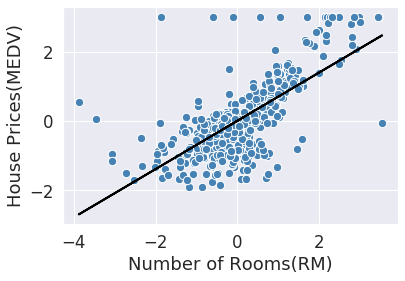

In [78]:
lin_reg_plot(X_std, y_std, lr)

# Scikit Learn - Linear Regression 

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
slr = LinearRegression()

In [81]:
slr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
slr.coef_[0]

9.10210898118031

In [83]:
slr.intercept_

-34.67062077643857

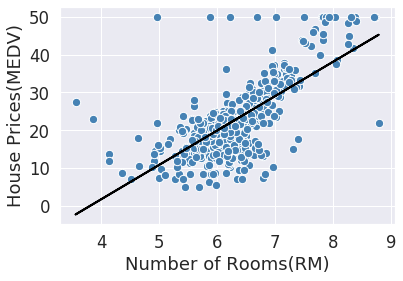

In [84]:
lin_reg_plot(X,y,slr)

# Multiple Linear Regreession and Its Evaluation Metrics

In [88]:
from sklearn.model_selection import train_test_split
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [91]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3 , random_state =0)

In [94]:
slr = LinearRegression()

In [95]:
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_train_pred = slr.predict(X_train)

In [97]:
y_test_pred = slr.predict(X_test)

#### Residul Plot

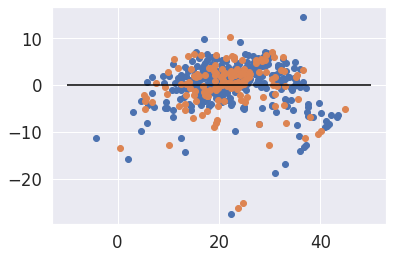

In [100]:
plt.scatter(y_train_pred, y_train_pred - y_train)
plt.scatter(y_test_pred, y_test_pred -y_test)
plt.hlines(y =0, xmin =-10, xmax = 50, color ='black')

#### MSE Error

In [101]:
from sklearn.metrics import mean_squared_error

In [102]:
mean_squared_error(y_train, y_train_pred)

19.958219814238046

In [103]:
mean_squared_error(y_test, y_test_pred)

27.195965766883354

### r2 score

In [104]:
from sklearn.metrics import r2_score

In [105]:
r2_score(y_train, y_train_pred)

0.7645451026942549

In [106]:
r2_score(y_test, y_test_pred)

0.6733825506400177

### Regularized Linear Regresson

In [108]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [110]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [111]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)